In [1]:
import glob; import sys; import os
import pandas as pd
import numpy as np
import functions
import matplotlib.pyplot as plt
from scipy.integrate import ode
from matplotlib.lines import Line2D
import pickle as pkl


pd.options.mode.chained_assignment = None
plt.rcParams.update({'font.size': 20}) # Set a good font size

rsol2AU = 0.00465047 # solar radii to au

In [6]:
dataDir = functions.get_Started()

Possible Directories:

0 : COMPAS_Output
1 : COMPAS_Output_1%sol_fallback
2 : COMPAS_Output_1%sol_noKicks
3 : COMPAS_Output_1%sol_reduced
4 : COMPAS_Output_1%_correctedEVO
5 : COMPAS_Output_1%_no_CHE
6 : COMPAS_Output_1%_pessCHE
7 : COMPAS_Output_alpha1_Z0.0001
8 : COMPAS_Output_largea_detailed
9 : COMPAS_Output_largea_detailed2
10 : COMPAS_Output_noBHKick_Z0.0001
11 : COMPAS_Output_noBHKick_Z0.001
12 : COMPAS_Output_noChem
13 : COMPAS_Output_PeTar_M100000
14 : COMPAS_Output_smalla_detailed
15 : COMPAS_Output_smalla_detailed2
16 : COMPAS_Output_sol_correctEVO
17 : COMPAS_Output_sol_no_CHE
18 : COMPAS_Output_SSE_Z0.00015
19 : COMPAS_Output_SSE_Z0.0015
20 : COMPAS_Output_test
21 : COMPAS_Output_test2
22 : COMPAS_Output_testSOL
23 : COMPAS_Output_Z0.0001
24 : COMPAS_Output_Z0.00015
25 : COMPAS_Output_Z0.0005
26 : COMPAS_Output_Z0.00075
27 : COMPAS_Output_Z0.001
28 : COMPAS_Output_Z0.0015
29 : COMPAS_Output_Z0.005
30 : COMPAS_Output_Z0.0075
31 : COMPAS_Output_Z0.01
32 : COMPAS_Output_Z0.01


What directory is the data stored in?    32


In [7]:
# Load in the respective COMPAS data
SP  = pd.read_csv(os.path.join(dataDir, 'BSE_System_Parameters.csv'), skiprows=2) # For initial distributions
SP = SP.loc[SP['Equilibrated_At_Birth']!=1] 

DCO = pd.read_csv(os.path.join(dataDir, 'BSE_Double_Compact_Objects.csv'), skiprows=2) # For final distributions
BBH = DCO.loc[(DCO['Stellar_Type(1)']==14)&(DCO['Stellar_Type(2)']==14)]

In [8]:
# load the petar data
with open(os.path.join(dataDir, 'petar_dist.pickle'), 'rb') as f:
    petar_dist = pkl.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'COMPAS_Output_Z0.01_test\\petar_dist.pickle'

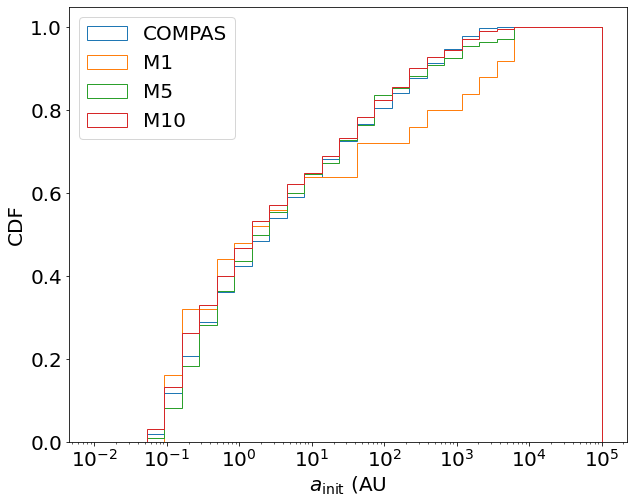

In [5]:
# Plot the init semi major axis distribution
fig, ax = plt.subplots(figsize=(10,8))

bins=np.logspace(-2, 5, 30)

ax.hist(SP['SemiMajorAxis@ZAMS'], bins=bins, histtype='step', density=True, cumulative=True, label='COMPAS')

for key, item in petar_dist.items():
    BBH = item[0]
    ax.hist(BBH[:,0], bins=bins, histtype='step', density=True, cumulative=True, label=key)

ax.set_xlabel('$a_{\mathrm{init}}$ (AU')
ax.set_ylabel('CDF')
ax.set_xscale('log')
ax.legend(loc='upper left')

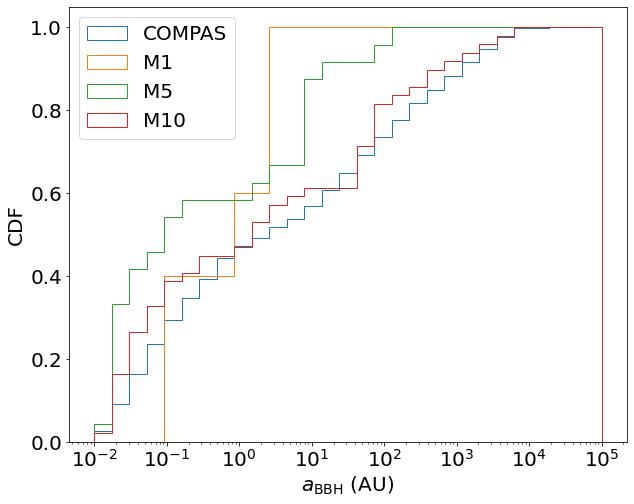

In [23]:
# Plot the final semi major axis distribution
fig, ax = plt.subplots(figsize=(10,8))

bins=np.logspace(-2, 5, 30)

ax.hist(DCO['SemiMajorAxis@DCO'], bins=bins, histtype='step', density=True, cumulative=True, label='COMPAS')

for key, item in petar_dist.items():
    BBH = item[1]
    ax.hist(BBH[:,0], bins=bins, histtype='step', density=True, cumulative=True, label=key)

ax.set_xlabel('$a_{\mathrm{BBH}}$ (AU)')
ax.set_ylabel('CDF')
ax.set_xscale('log')
ax.legend(loc='upper left')